# Analysis

## Questions

### Are crashes in Chicago more prevalent on a certain day of the week?

We noticed several columns in this dataset were related to time. We decided to examine whether or not crashes were more common on any given day of the week. Perhaps more crashes happen on weekdays as opposed to weekends? Below is our exploration of traffic accidents in relation to days of the week.

In [1]:
# Import dependencies
import gmaps
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from config import gkey

In [2]:
# Convert the CSV created from our 'cleanup' phase to a dataframe.
df_crashes = pd.read_csv('Output/Crashes.csv')
warnings.filterwarnings('ignore')
# Brief bit of additional cleanup
del df_crashes['Unnamed: 0']

#### I decided to create a different dataframe for each day of the week...

In [3]:
sunday = df_crashes.loc[df_crashes['CRASH_DAY_OF_WEEK'] == 1, ['CRASH_HOUR']]
monday = df_crashes.loc[df_crashes['CRASH_DAY_OF_WEEK'] == 2, ['CRASH_HOUR']]
tuesday = df_crashes.loc[df_crashes['CRASH_DAY_OF_WEEK'] == 3, ['CRASH_HOUR']]
wednesday = df_crashes.loc[df_crashes['CRASH_DAY_OF_WEEK'] == 4, ['CRASH_HOUR']]
thursday = df_crashes.loc[df_crashes['CRASH_DAY_OF_WEEK'] == 5, ['CRASH_HOUR']]
friday = df_crashes.loc[df_crashes['CRASH_DAY_OF_WEEK'] == 6, ['CRASH_HOUR']]
saturday = df_crashes.loc[df_crashes['CRASH_DAY_OF_WEEK'] == 7, ['CRASH_HOUR']]

#### ...and then append the lengths to one long list to feed into a plot

In [4]:
day_list = []
day_list.append(len(sunday['CRASH_HOUR']))
day_list.append(len(monday['CRASH_HOUR']))
day_list.append(len(tuesday['CRASH_HOUR']))
day_list.append(len(wednesday['CRASH_HOUR']))
day_list.append(len(thursday['CRASH_HOUR']))
day_list.append(len(friday['CRASH_HOUR']))
day_list.append(len(saturday['CRASH_HOUR']))

#### From here I build the plot - I want it to show each day on the x-axis and the number of crashes that occurred on that day on the y-axis.

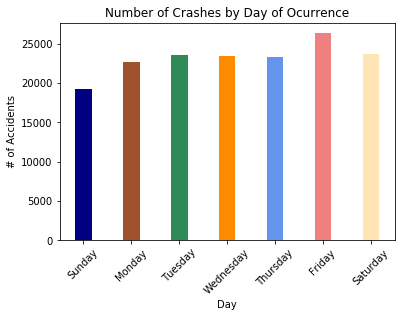

In [5]:
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
color = ['navy', 'sienna', 'seagreen', 'darkorange', 'cornflowerblue', 'lightcoral', 'moccasin']
plt.bar(week, day_list, width=0.35, color=color)
plt.ylabel('# of Accidents')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.title('Number of Crashes by Day of Ocurrence')
plt.savefig('Images/Bar_Wreck_by_day.png')
plt.show()

## Does this really tell us anything?

#### We can conclude that we have an even distribution by days of the week
It looks like Sunday has a slightly lower amount of crashes while Friday has the most. Overall, just from this preliminary analysis, we don't necessarily see a spike in the number of crashes by day of the week. Weekdays aside from Friday look extremely similar in terms of the number of accidents. The number of incidents do not appear to drop significantly over the weekend as we initially thought.

## Ok, so there's a fairly even distribution by days of the week. What about time of day?

### Is there a certain timeframe where accidents are more common on each day of the week?

Let's take a closer look at when traffic incidents happen on each day of the week. We might hypothesize that since there are more cars on the road during morning and afternoon rush hour traffic, that accidents will be more likely. Do a lot of accidents happen late at night? What about lunch time? Our dataset can tell us this.

#### Let's create a new dataframe and use binning to group times of day

In [6]:
crash_hours = pd.DataFrame(df_crashes[['CRASH_DAY_OF_WEEK', 'CRASH_HOUR']])
hrs = [-1, 6, 10, 14, 19, 23]
groups = ['Midnight - 6AM', '7AM - 10AM', '11AM - 2PM', '3PM - 7PM', '8PM - 11PM']
crash_hours['Hours'] = pd.cut(crash_hours['CRASH_HOUR'], bins=hrs, labels=groups)
crash_hours = crash_hours.groupby('CRASH_DAY_OF_WEEK')

#### For each day of the week I want to apply the bins I created

In [7]:
sunday['CAT'] = pd.cut(sunday['CRASH_HOUR'], bins=hrs, labels=groups)
sunday_grouped = sunday.groupby('CAT')
sun_list = sunday_grouped['CRASH_HOUR'].count().tolist()
monday['CAT'] = pd.cut(monday['CRASH_HOUR'], bins=hrs, labels=groups)
monday_grouped = monday.groupby('CAT')
mon_list = monday_grouped['CRASH_HOUR'].count().tolist()
tuesday['CAT'] = pd.cut(tuesday['CRASH_HOUR'], bins=hrs, labels=groups)
tuesday_grouped = tuesday.groupby('CAT')
tues_list = tuesday_grouped['CRASH_HOUR'].count().tolist()
wednesday['CAT'] = pd.cut(wednesday['CRASH_HOUR'], bins=hrs, labels=groups)
wednesday_grouped = wednesday.groupby('CAT')
wed_list = wednesday_grouped['CRASH_HOUR'].count().tolist()
thursday['CAT'] = pd.cut(thursday['CRASH_HOUR'], bins=hrs, labels=groups)
thursday_grouped = thursday.groupby('CAT')
thurs_list = thursday_grouped['CRASH_HOUR'].count().tolist()
friday['CAT'] = pd.cut(friday['CRASH_HOUR'], bins=hrs, labels=groups)
friday_grouped = friday.groupby('CAT')
fri_list = friday_grouped['CRASH_HOUR'].count().tolist()
saturday['CAT'] = pd.cut(saturday['CRASH_HOUR'], bins=hrs, labels=groups)
saturday_grouped = saturday.groupby('CAT')
sat_list = saturday_grouped['CRASH_HOUR'].count().tolist()

#### Create another new dataframe from all the grouped lists that were created by count of accident by timeframe by day.

In [8]:
new_df = pd.DataFrame({'Category': ['Midnight - 6AM', '7AM - 10AM', '11AM - 2PM', '3PM - 7PM', '8PM - 11PM'],
                       'Sunday': sun_list,
                       'Monday': mon_list,
                       'Tuesday': tues_list,
                       'Wednesday': wed_list,
                       'Thursday': thurs_list,
                       'Friday': fri_list,
                       'Saturday': sat_list
                       })
new_df.set_index('Category', inplace=True)
new_df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Category,,,,,,,
Midnight - 6AM,4468,2268,1821,1817,1894,2072,3499
7AM - 10AM,2210,5246,5597,5611,5302,5017,3134
11AM - 2PM,4626,5132,5306,5353,5130,6107,6193
3PM - 7PM,5301,7818,8460,8133,8322,9417,6956
8PM - 11PM,2578,2136,2382,2496,2605,3699,3949


#### The above dataframe looks like I want it to. It has the count of accidents by timeframe by day of the week. In order to plot it I need to flip it.

In [9]:
grouped_bar = new_df.transpose(copy=True)
grouped_bar

Category,Midnight - 6AM,7AM - 10AM,11AM - 2PM,3PM - 7PM,8PM - 11PM
Sunday,4468,2210,4626,5301,2578
Monday,2268,5246,5132,7818,2136
Tuesday,1821,5597,5306,8460,2382
Wednesday,1817,5611,5353,8133,2496
Thursday,1894,5302,5130,8322,2605
Friday,2072,5017,6107,9417,3699
Saturday,3499,3134,6193,6956,3949


#### Ok - as the name of the variable suggests, I want to make a grouped bar chart from this dataframe. It should show each day of the week grouped into timeframes, and the number of traffic incidents that happened in those timeframes.

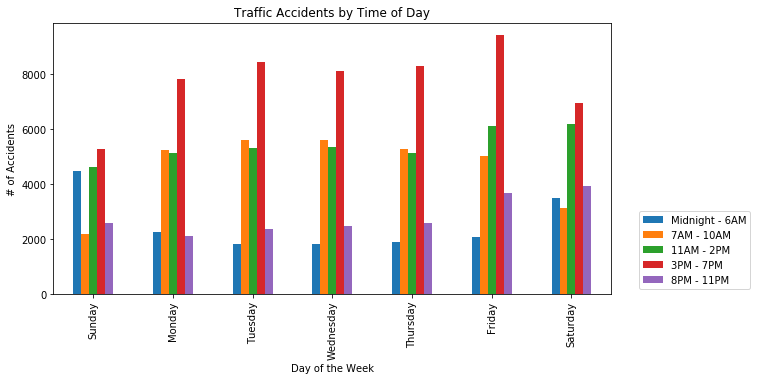

In [10]:
grouped_bar.plot.bar(figsize = (10, 5))
plt.legend(loc='lower left', bbox_to_anchor=(1.04, 0))
plt.xlabel('Day of the Week')
plt.ylabel('# of Accidents')
plt.title('Traffic Accidents by Time of Day')
plt.savefig('Images/Time_GroupPlot.png')
plt.show()

## Rush hour really is bad!

### We can conclude that the 3:00PM - 7:00PM timeframe is the worst across each day. What else?

The number of traffic incidents during afternoon rush hour far outnumber any other timeframe category. This makes sense as it does in any major city. People are leaving work, running errands, getting dinner, fetching children from school more commonly during this time. The morning rush hour doesn't look quite as significant and, on weekdays, is very similar to the lunch rush time frame. 

Late night/early morning wrecks seem to be the lowest but look to spike in the early hours of Saturday morning (Friday night) and Sunday morning (Saturday night). People tend to stay up and out later during these hours. If more time permitted, it might be interesting to examine known causes of these incidents and to see what percentage of them are possibly alcohol related.

## The Bigger Picture (Timewise)

### What do these numbers look like over the time the data was being collected

According to the metadata, all police departments weren't fully contributing to this dataset until 2017. We should expect to see the number of crashes rise during this year. But since we've looked at day and, more specifically, time of day; is there a spike in traffic incidents during certain months? How does one year of this data record-keeping compare to another?

#### I want to look at crash count by year and month over time. The best way to do this is a line plot. I need to do some data and string manipulation to extract the year...

In [11]:
# Data conversion and string manipulation to create YEAR column
df_crashes['CRASH_DATE_STR'] = df_crashes['CRASH_DATE'].astype(str)
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])
df_crashes['CRASH_DATE'] = df_crashes['CRASH_DATE'].astype(str)
df_crashes['YEAR'] = df_crashes['CRASH_DATE'].str[:4]
df_crashes['YEAR'].head()
by_year_df = df_crashes[['YEAR', 'CRASH_MONTH']]

#### I need to get the count of each accident each month and then group by year

In [12]:
# The resulting dataframe of these variables is going to be out of order
# This is because we needed to populate it first by a year that had data for
# all 12 months.
seventeen = by_year_df.loc[by_year_df['YEAR'] == '2017']
years = seventeen.groupby('CRASH_MONTH').count().rename(columns={'YEAR': '2017'})
fourteen = by_year_df.loc[by_year_df['YEAR'] == '2014']
years['2014'] = fourteen.groupby('CRASH_MONTH').count()['YEAR']
fifteen = by_year_df.loc[by_year_df['YEAR'] == '2015']
years['2015'] = fifteen.groupby('CRASH_MONTH').count()['YEAR']
sixteen = by_year_df.loc[by_year_df['YEAR'] == '2016']
years['2016'] = sixteen.groupby('CRASH_MONTH').count()['YEAR']
seventeen = by_year_df.loc[by_year_df['YEAR'] == '2017']
years['2017'] = seventeen.groupby('CRASH_MONTH').count()['YEAR']
eighteen = by_year_df.loc[by_year_df['YEAR'] == '2018']
years['2018'] = eighteen.groupby('CRASH_MONTH').count()['YEAR']
years = years.fillna(0)
years.reset_index('CRASH_MONTH', inplace=True)

#### The resulting dataframe below can be used to build our line plot. It's also a pretty good visual tabular reference to examine what is going on with crash data across each year the data was collected.

In [13]:
# Re order the dataframe
years_to_plot = years[['CRASH_MONTH', '2014', '2015', '2016', '2017', '2018']]
years_to_plot

,CRASH_MONTH,2014,2015,2016,2017,2018
0,1,0.0,0.0,2387,3503,5955.0
1,2,0.0,1.0,2198,3356,5325.0
2,3,0.0,0.0,2449,4143,5772.0
3,4,0.0,2.0,2395,4211,6140.0
4,5,0.0,2.0,2583,4901,6584.0
5,6,0.0,2.0,2332,5058,6593.0
6,7,0.0,14.0,2738,5766,6184.0
7,8,2.0,417.0,3661,5920,5946.0
8,9,0.0,1322.0,3855,5976,5714.0
9,10,0.0,2494.0,4090,6466,618.0


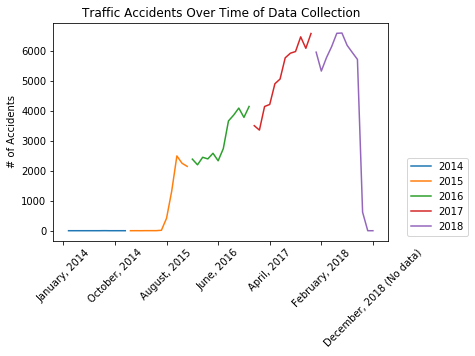

In [14]:
# This is a plot that builds on itself. It is pieced together year by year. 
plt.plot(years_to_plot['CRASH_MONTH'], years_to_plot['2014'], label = '2014')
yr_list = [x + 12 for x in years_to_plot['CRASH_MONTH']]
plt.plot(yr_list, years_to_plot['2015'], label  = '2015')
yr_list = [x + 12 for x in yr_list]
plt.plot(yr_list, years_to_plot['2016'], label = '2016')
yr_list = [x + 12 for x in yr_list]
plt.plot(yr_list, years_to_plot['2017'], label = '2017')
yr_list = [x + 12 for x in yr_list]
plt.plot(yr_list, years_to_plot['2018'], label='2018')
plt.xticks([0, 10, 20, 30, 40, 50, 60], ['January, 2014', 'October, 2014', 'August, 2015', 'June, 2016',
                                         'April, 2017', 'February, 2018', 'December, 2018 (No data)'], rotation=45)
plt.ylabel('# of Accidents')
plt.title('Traffic Accidents Over Time of Data Collection')
plt.legend(loc='lower left', bbox_to_anchor=(1.04, 0))
plt.savefig('Images/Accidents_bymonthandyear.png')
plt.show()

# Perhaps it's too early to tell

From the above plot we see that this system of electronically reporting traffic incidents began in 2015. We know from the metadata that citywide data did not become available until 2017. Once traffic data first became available, traffic accidents appeared to increase as time went on. We think this has something to do with more and more data becoming available rather than traffic incidents increasing so significantly. It's interesting to look at the availability of data in this way. We cannot yet determine what the chart will do in the future. The drop towards zero is obviously directly related to no data being available yet. So the only real analysis we can perform is on all of 2017 and the earlier part of 2018. 

As data becomes more available, and if the City decides it wants to keep its e-reporting system in place; this kind of data might be used for more predictive modeling.

## Let's get mapping

#### What do these accidents look like on a map? Coordinates are recorded for most of the incidents. Are they centralized or are they spread out?

We'll use the API provided through Google Maps to make this investigation.

In [15]:
# Create a new dataframe from just the geographic coordinates of each accident (if included)
gmaps.configure(api_key=gkey)
locations = df_crashes[['LATITUDE', 'LONGITUDE']]
locations2 = locations.dropna()
locations2.head()

NameError: name 'gkey' is not defined

#### Above is a snippet of our geo-coordinates. We've dropped the null values so the output is as expected. We will see below that we didn't lose too many records.

In [ ]:
locations2.shape

#### Now we'll build a heatmap based on all crashes derived from the dataframe we just created

In [ ]:
# Customize the size of the figure. Inside curly brackets is CSS for added styling.
figure_layout = {
    'width': '600px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
chicago_coords = (41.85,-87.64)

fig = gmaps.figure(layout=figure_layout,center=chicago_coords, zoom_level=11)

In [ ]:
# Assign the marker layer to a variable
#markers = gmaps.marker_layer(locations2)
heatmap_layer = gmaps.heatmap_layer(locations2)
#, fill_color='green', stroke_color='green', scale=2
heatmap_layer.max_intensity = 35
heatmap_layer.poin_radius = 2
# Add the layer to the map
fig.add_layer(heatmap_layer)
fig

![Crash Heatmap](https://github.com/Bwig/Project_1/blob/Analysis_RH/Chicago%20All%20Crashes%20Heat%20Gmap3.png?raw=true)

# Crashes appear to be pretty centralized

The above heat map gives us a good indication where accidents most commonly happen. It looks like they are related to volume and congestion and this adds to our conclusion that greater traffic increases the likelihood of an accident (even a minor one). 

Also, upon reaching the outer limits of where traffic would likely be most congested, we can say that accidents are more likely to occur at intersections of more arterial roads. We can also see a pattern of the North/South, East/West configuration of roadways. For example, towards the southern outer boundary, we can see that more accidents tend to occur on North/South oriented roads.

# What do crashes that involve fatalities look like?

So far, we have been looking at traffic accidents overall. What about the more serious ones? Can we tell anything about them by mapping them?

In [ ]:
# Initialize a dataset for all accidents involving fatalities
crashes3 = df_crashes[df_crashes.INJURIES_FATAL > 0]
# Ensure the data looks as expected
crashes3.head()

In [22]:
crashes3.shape

(155, 36)

In [ ]:
# Create the dataframe
locations = crashes3[['LATITUDE', 'LONGITUDE']]

In [ ]:
# Customize the size of the figure. Inside curly brackets is CSS for added styling.
figure_layout = {
    'width': '800px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [ ]:
# Assign the marker layer to a variable
#markers = gmaps.marker_layer(locations2)
crashes_layer = gmaps.symbol_layer(
    locations, fill_color='green', stroke_color='green', scale=2
)
# Add the layer to the map
fig.add_layer(crashes_layer)
fig

![Fatalities heatmap](https://github.com/Bwig/Project_1/blob/Analysis_RH/Chicago%20Fatal%20Crashes%20Map-bigger%20markers.png?raw=true)

## The geographic distribution of fatal crashes does not seem to adhere to any obvious pattern

This looks more or less like a subset of the total crashes heatmap above. We do observe some clustering in more centralized locations. The greater the distance from the downtown or Central Business District area, the fewer number of ocurrences of fatalities. This is one area we believe our dataset might fall short. The metadata mentions that other police jurisdictions had their own methods for reporting, so we are likely missing a significant amount of data involving fatal crashes (particularly among major interstate routes).

## Revisiting Days and Hours

### Exploration of Different Visualization Techniques

Can we gain additional insight by visualizing traffic accidents by time a different way?

#### We used Seaborn to display a 'heatmap' type visualization of accidents by day of week and by hour

In [16]:
day_hour = df_crashes.groupby(['CRASH_DAY_OF_WEEK','CRASH_HOUR']).count()["RD_NO"]

In [17]:
day_hour2 = day_hour.reset_index()

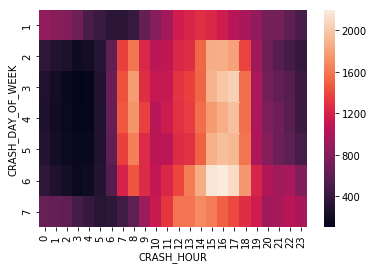

In [18]:
heatmap_df = day_hour2.pivot('CRASH_DAY_OF_WEEK','CRASH_HOUR','RD_NO')
display_heatmap = sns.heatmap(heatmap_df)

#### Above is the first result of the heatmap. We were able to replicate our results from earlier. Here, we do see a more noticeable difference in that there is a higher concentration of crashes during the morning and evening rush hours amongst weekdays. Friday stands out a bit more in this visualization.

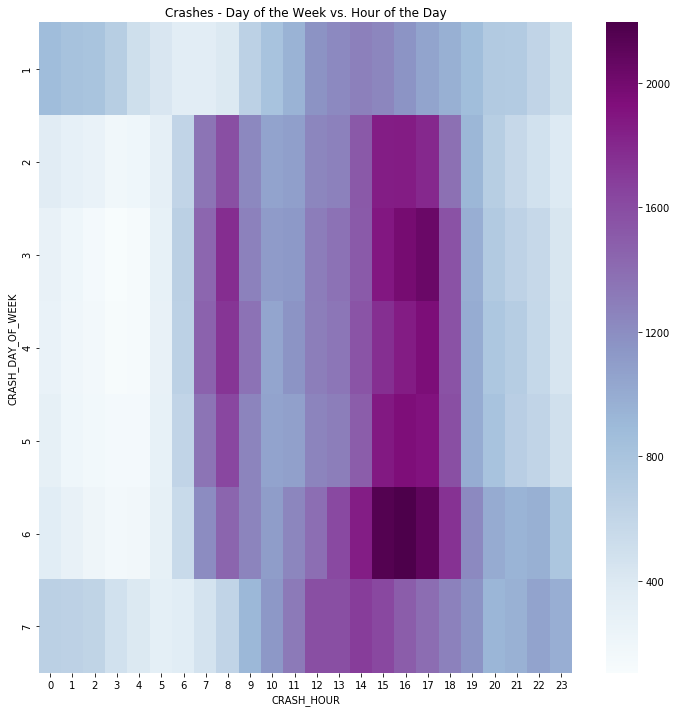

In [19]:
# Reconfigure the heatmap
fig, ax = plt.subplots(figsize=(10,10))
display_heatmap = sns.heatmap(heatmap_df, ax=ax,cmap="BuPu")
plt.title("Crashes - Day of the Week vs. Hour of the Day")
ax.figure.tight_layout()

# A Higher Volume of morning rush hour incidents

This is a slightly larger look at the first heatmap. It is perhaps a better way to hightlight the higher volume of incidents during the morning rush.

# Impact of Weather and Lighting

Weather and lighting conditions were included in the reports for this dataset. Let's take a closer look. One might expect that poor lighting and less-than-favorable weather conditions should contribute to more accidents.

In [20]:
# Isolate the needed columns in a separate dataframe
weatherVlighting = df_crashes.groupby(['WEATHER_CONDITION','LIGHTING_CONDITION']).count()["RD_NO"]
weatherVlighting = weatherVlighting.reset_index()
# Examine the dataframe
weatherVlighting.head()

,WEATHER_CONDITION,LIGHTING_CONDITION,RD_NO
0,CLEAR,DARKNESS,5800
1,CLEAR,"DARKNESS, LIGHTED ROAD",26519
2,CLEAR,DAWN,1854
3,CLEAR,DAYLIGHT,91187
4,CLEAR,DUSK,3696


#### Using Seaborn, we'll make a similar heatmap for weather and lighting conditions

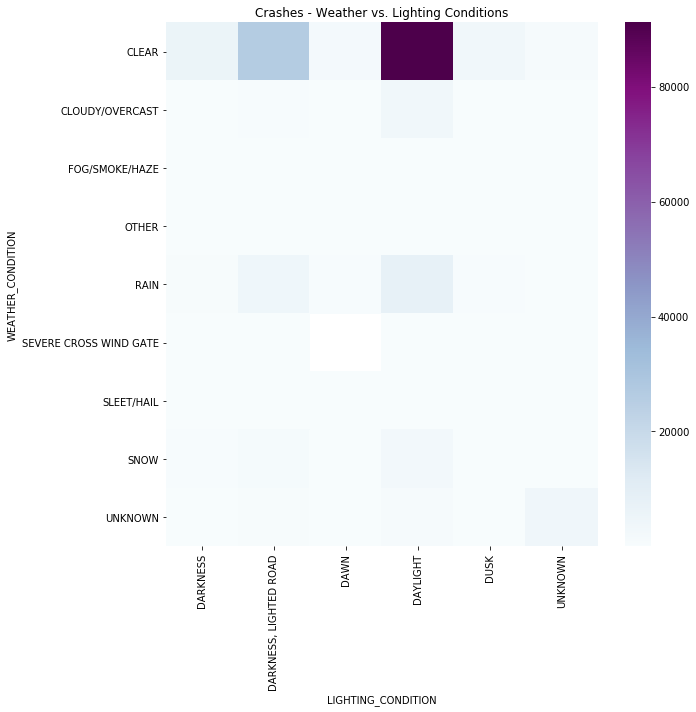

In [21]:
heatmap2_df = weatherVlighting.pivot('WEATHER_CONDITION','LIGHTING_CONDITION','RD_NO')

fig, ax = plt.subplots(figsize=(10,10))
display_heatmap = sns.heatmap(heatmap2_df,ax=ax,cmap="BuPu")
plt.title("Crashes - Weather vs. Lighting Conditions")
ax.figure.tight_layout()

# Not what we expected

This is a good way of visualizing several variables at once, our hypothesis that poor weather/lighting conditions turns out to be incorrect according to this dataset. We can see that the greatest amount of accidents occurred during daylight conditions on clear days. This could be due to limitations or poor reporting. Since about half of the reporters were drivers involved in accidents themselves, care may not have been taken to record the actual conditions.

# What is the most common type of crash?

### Furthermore, how many accidents involved a traffic signal?

We might expect that higher speed might contribute to a higher volume of traffic accidents. However, the maps above showed the greatest concentration of accidents in more centralized, congested areas. 

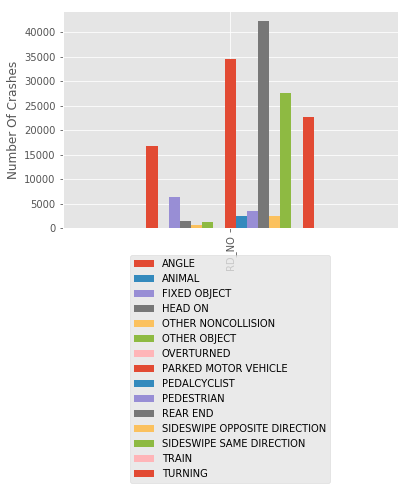

In [23]:
# Create a grouped bar plot to show the most common type of crash as reported in the dataset.
crash_type = df_crashes.groupby(['FIRST_CRASH_TYPE']).count()["RD_NO"]
crash_type = pd.DataFrame(crash_type)
plt.style.use('ggplot')
crash_type.T.plot.bar()
plt.ylabel("Number Of Crashes")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.savefig("crash_type.png")
plt.show()

### The most common types of crashes stand out as rear end crashes, parked vehicle, and same direction crashes

The high number of parked motor vehicle crashes is somewhat surprising, but it shows that each collision is likely a lower-speed collision on a heavily congested roadway. In this case, higher speed is likely not a significant contributing factor.

### Let's build a plot of the posted speed limit recorded for each incident

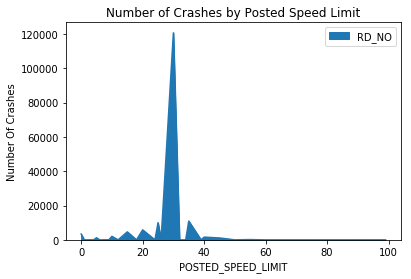

In [42]:
# Create an area plot to show the most common posted speed limit for each wreck.
speed_limit = df_crashes.groupby(['POSTED_SPEED_LIMIT']).count()["RD_NO"]
speed_limit = pd.DataFrame(speed_limit)
speed_limit.plot.area()
plt.title('Number of Crashes by Posted Speed Limit')
plt.ylabel("Number Of Crashes")
plt.show()

# The vast majority of accidents ocurred in low speed-limit zones 

### (Around 30mph)

The conclusion we drew above makes sense now. Rear end crashes and parked car incidents are indicative of high, slow-moving congestion around the center of downtown Chicago.

# What about intersections?
We noticed a high concentration of car accidents in a smaller, centralized area when looking at our heatmaps. We also noticed that there were pockets of large numbers of crashes farther out that seemed to be centralized around intersections. Can we show any additional data that supports this?

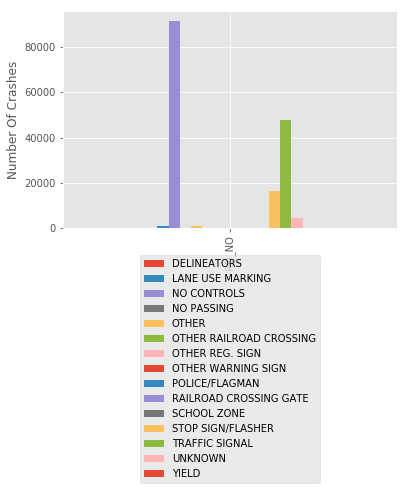

In [24]:
# Build a grouped bar chart of crashes by traffic signal type
control_device= df_crashes.groupby(['TRAFFIC_CONTROL_DEVICE']).count()["RD_NO"]
control_device = pd.DataFrame(control_device)
control_device.T.plot.bar()
plt.style.use('ggplot')
plt.ylabel("Number Of Crashes")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.savefig("control_device.png")
plt.show()

## While most accidents had no controls, a portion of them did involve a traffic signal or stop sign

This aligns with the idea that the smaller grouping of accidents on the inner city's outskirts seemed to more commonly involve an intersection. The large grouping of wrecks that don't relate with a traffic signal again highlights the role that high volume plays in the number of incidents each day.

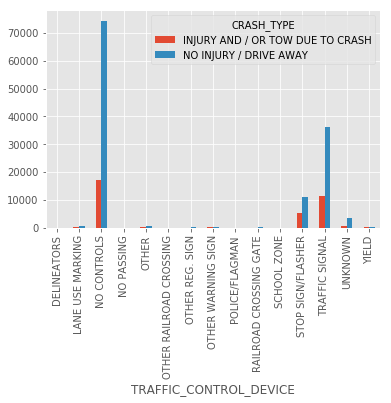

In [27]:
type_control = pd.crosstab(df_crashes.CRASH_TYPE, df_crashes.TRAFFIC_CONTROL_DEVICE)
type_control.T.plot.bar()
plt.savefig("type_control.png")
plt.show()

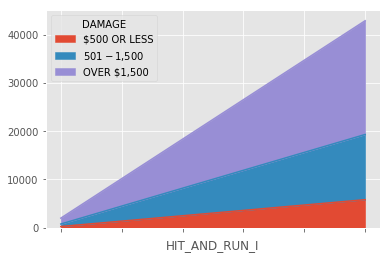

In [29]:
hit_damage = pd.crosstab(df_crashes.DAMAGE, df_crashes.HIT_AND_RUN_I)
hit_damage.T.plot.area()
plt.savefig("hit_damage.png")
plt.show()

### Questions?